In [1]:
import scipy.io #Used to load the OCTAVE *.mat files
import numpy as np
import sys
sys.path.append ('../src')
from NeuralNetwork import NNClassifier
from ML_utils import UTIL_formatY,backward_prop,backpropagation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix,classification_report


In [6]:
# lEEMOS LOS DATOS PARA TRAINING Y LOS PREPARAMOS 

fileName = 'data/ex4data1.mat'
mat = scipy.io.loadmat(fileName)

X = mat['X']
Y = mat['y']
X = np.insert(X,0,1,axis=1)
Y = Y - 1  #Y[Y==10]=0   # convert 10 to 0
fY = UTIL_formatY (Y,num_labels=10)   # Pasamos de y=[3] a fY=[0 0 0 1 0 0 0 0 0]

# DIVIDIMOS LOS DATOS EN TRAINING Y TEST SET

X_train,X_test,fY_train,fY_test = train_test_split(X,fY,test_size=0.3,random_state=50)

print ('"X_train" shape:%s.X[0] shape:%s' %(X_train.shape,X[0].shape))
print ('"y_train" shape:%s. Unique elements in y:%s' %(fY_train.shape,np.unique(fY_train)))
print ('"X_test" shape:%s.X[0] shape:%s' %(X_test.shape,X[0].shape))
print ('"y_test" shape:%s. Unique elements in y:%s' %(fY_test.shape,np.unique(fY_test)))

"X_train" shape:(3500, 401).X[0] shape:(401,)
"y_train" shape:(3500, 10). Unique elements in y:[0. 1.]
"X_test" shape:(1500, 401).X[0] shape:(401,)
"y_test" shape:(1500, 10). Unique elements in y:[0. 1.]
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0

In [5]:
# ENTRENAMOS LA RED NEURONAL

nn_config={'n_a1':400,'n_a2':25,'n_a3':10 }   # Configuración de red NN , input layer , hidder layers , output layer
sgd_dict =   {'steps':3000,'learning_rate':0.035}
opt_dict =   {}
method = 'SGD'
nn = NNClassifier(optimization=method,nn_config=nn_config,debug=False,kargs=sgd_dict)
costs = nn.optimize (X_train,fY_train,l2_lambda=0.0)
prediction,_ = nn.forward_prop (X_train)
result = np.argmax(prediction,axis=1).reshape(-1,1)
y = np.argmax(fY_train,axis=1).reshape(-1,1)
accuracy = np.mean(y==result) * 100
print ('Trainig set accuracy :' , accuracy  )

test_predicted,_ = nn.forward_prop (X_test)
result = np.argmax(test_predicted,axis=1).reshape(-1,1)
y = np.argmax(fY_test,axis=1).reshape(-1,1)
accuracy = np.mean(y==result) * 100
print ('Test set accuracy :' , accuracy  )

print(f"Classification report for classifier {nn}:\n"
      f"{classification_report(y,result)}\n")

LR = 0.035:  12%|████████▎                                                          | 374/3000 [00:13<01:32, 28.53it/s]


AssertionError: No parece que SGD esté convergiendo revisa alpha 9.333333333333334e-05,cost 3.252459914217514iteration 374

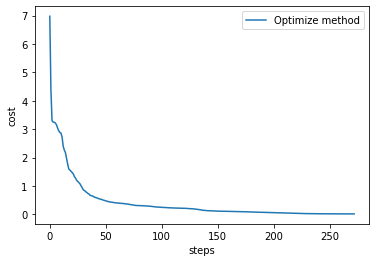

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
if method == 'Optimize':
    steps = np.arange (len(costs))
    plt.plot( steps , costs,label='Optimize method')
else:
    steps = np.arange (sgd_dict['steps'])
    plt.plot( steps , costs,label='SGD - LR ' + str(sgd_dict['learning_rate']))
plt.xlabel('steps')
plt.ylabel('cost')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

fY = UTIL_formatY (Y,num_labels=10)
nn.optimize (X,fY)
prediction,cache = nn.forward_prop (X)
prediction[prediction >= 0.5] = 1
prediction[prediction < 0.5] = 0
accuracy = accuracy_score (fY.flatten(),prediction.flatten())
print (accuracy)


../src\ML_utils.py:103: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp (-Z))


In [5]:
l2_lambda=1.0
fY = UTIL_formatY (Y,10)
nn = NNClassifier()

#nn.checkGradient(10,)
prediction, cache = nn.forward_prop (X)
cost = nn.costFunction (X,fY,l2_lambda=l2_lambda)
deltas,grads = nn.backward_prop (X,fY,l2_lambda=l2_lambda)

In [6]:
# Testing 
l2_lambda=1.0
paramFile = 'data/ex4weights.mat'
params = scipy.io.loadmat(paramFile)
Theta1 = params['Theta1']
Theta2 = params['Theta2']
nn = NNClassifier()
nn.thetas ['Theta1'] = Theta1
nn.thetas ['Theta2'] = Theta2
prediction, cache = nn.forward_prop (X)
cost = nn.costFunction (X,fY,l2_lambda=l2_lambda)
nnmideltas,nngrads = nn.backward_prop (X,fY,l2_lambda=l2_lambda)

In [7]:
print (cost)

0.384487796242894


In [8]:
mylambda = 1.0
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10
grad ,deltas= backpropagation(np.append(Theta1.flatten(),Theta2.flatten()),  X, Y, mylambda,input_layer_size, hidden_layer_size,num_labels)
assert np.array_equal (deltas['delta3'],nnmideltas['delta3'])
assert np.array_equal (deltas['delta2'],nnmideltas['delta2'])
assert np.array_equal (deltas['grad2'],nngrads['grad2'])
assert np.array_equal (deltas['grad1'],nngrads['grad1'])

the type of nn_params in reshapeParams is:<class 'numpy.ndarray'>
Sigmoid gradient - shapes X (5000, 401) theta (25, 401) sigrad (5000, 25)
Grad2 shapes delta3 (5000, 10) a2 (5000, 26), grad2 (10, 26) 


In [9]:
mylambda = 1.0
Thetas = [Theta1,Theta2]
grad ,deltas= backpropagation(np.append(Theta1.flatten(),Theta2.flatten()),  X, Y, mylambda,input_layer_size, hidden_layer_size,num_labels)
mideltas , grads = backward_prop (X,fY,Thetas,l2_lambda=mylambda)
assert np.array_equal (deltas['delta3'],mideltas['delta3'])
assert np.array_equal (deltas['delta2'],mideltas['delta2'])
assert np.array_equal (deltas['grad2'],grads['grad2'])
assert np.array_equal (deltas['grad1'],grads['grad1'])

the type of nn_params in reshapeParams is:<class 'numpy.ndarray'>
Sigmoid gradient - shapes X (5000, 401) theta (25, 401) sigrad (5000, 25)
Grad2 shapes delta3 (5000, 10) a2 (5000, 26), grad2 (10, 26) 
Prediction shape (5000, 10)
Y shape (5000, 10)
Calculating delta layer  2
gprima_z shape (5000, 25)
deltai shape (5000, 10)
deltaiPREV shape (5000, 25)
Calculating grad2  2
Grad 2 shapes delta3 (5000, 10) a2 (5000, 26) , theta1 (10, 25), grad shape (10, 26) 
Calculating grad2  1
Grad 1 shapes delta2 (5000, 25) a1 (5000, 401) , theta0 (25, 400), grad shape (25, 401) 


In [15]:
from sklearn import datasets, svm, metrics
clf = svm.SVC(gamma=0.001)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, shuffle=False)
clf.fit(X_train, y_train.ravel())
predicted = clf.predict(X_test)
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00     500.0
           5       0.00      0.00      0.00     500.0
           6       0.00      0.00      0.00     500.0
           7       0.00      0.00      0.00     500.0
           8       0.00      0.00      0.00     500.0
           9       0.00      0.00      0.00       0.0

    accuracy                           0.00    2500.0
   macro avg       0.00      0.00      0.00    2500.0
weighted avg       0.00      0.00      0.00    2500.0




c:\users\0012708\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\0012708\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\0012708\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [13]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(Y, predicted)}\n")

ValueError: Found input variables with inconsistent numbers of samples: [5000, 1500]

In [11]:
lr=0.1
i=10
if i%10 == 0:
    lr /= i+1
print (lr)

0.009090909090909092


In [66]:
DD=6**0.5/(400+25)**0.5

In [67]:
print (DD)

0.1188177051572009
